<a href="https://colab.research.google.com/github/joaoeliandro/ia-estimativa-copa-2022/blob/main/estimativaCopa2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

selecoes = pd.read_excel('/content/DadosCopaDoMundoQatar2022.xlsx', sheet_name='selecoes', index_col=0)
jogos = pd.read_excel('/content/DadosCopaDoMundoQatar2022.xlsx', sheet_name='jogos')

In [11]:
selecoes.head()

,Grupo,GrupoNumero,NomeEmIngles,PosiçãoRankingFIFA,ValorDeMercado,PontosRankingFIFA,Confederação,Copas,JogadorDestaque,FotoJogadorDestaque,LinkBandeiraPequena,LinkBandeiraGrande
Seleção,,,,,,,,,,,,
Catar,A,A1,Qatar,48,18.33,1442,AFC,0,Almoez Ali,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Equador,A,A2,Ecuador,44,125.80,1464,UEFA,0,Pervis Estupiñán,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Senegal,A,A3,Senegal,18,286.50,1585,CAF,0,Sadio Mané,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Holanda,A,A4,Netherlands,8,455.75,1679,UEFA,0,Virgil Van Dijk,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...
Inglaterra,B,B1,England,5,1360.00,1737,UEFA,1,Harry Kane,https://github.com/ricardorocha86/PrevisaoEspo...,https://cloudinary.fifa.com/api/v3/picture/fla...,https://flagdownload.com/wp-content/uploads/Fl...


In [12]:
jogos.head()

,data,hora,grupo,seleção1,seleção2,estádio
0,2022-11-21,07:00:00,A,Senegal,Holanda,AL THUMAMA
1,2022-11-21,13:00:00,A,Catar,Equador,AL KHOR
2,2022-11-25,10:00:00,A,Catar,Senegal,AL THUMAMA
3,2022-11-25,13:00:00,A,Holanda,Equador,INTER. KHALIFA
4,2022-11-29,12:00:00,A,Holanda,Catar,AL KHOR


In [13]:
np.random.poisson(lam=1, size=1)

array([3])

In [2]:
fifa = selecoes['PontosRankingFIFA']
# Transformaçao linear de escala numerica
a, b = min(fifa), max(fifa)
fa, fb = 0.15, 1
b1 = (fb - fa)/(b-a)
b0 = fb - b*b1
forca = b0 + b1*fifa
forca

Seleção
Catar             0.243596
Equador           0.285618
Senegal           0.516742
Holanda           0.696292
Inglaterra        0.807079
Irã               0.467079
Estados Unidos    0.612247
País de Gales     0.511011
Argentina         0.872022
Arábia Saudita    0.232135
México            0.640899
Polônia           0.442247
França            0.860562
Dinamarca         0.669551
Tunísia           0.369663
Austrália         0.323820
Espanha           0.768876
Alemanha          0.658090
Japão             0.459438
Costa Rica        0.354382
Bélgica           0.969438
Canadá            0.304719
Marrocos          0.465169
Croácia           0.606517
Brasil            1.000000
Sérvia            0.449888
Suíça             0.585506
Camarões          0.325730
Portugal          0.696292
Gana              0.150000
Uruguai           0.623708
Coreia do Sul     0.404045
Name: PontosRankingFIFA, dtype: float64

In [3]:
def MediasPoisson(selecao1, selecao2):
  forca1 = forca[selecao1]
  forca2 = forca[selecao2]
  mgols = 2.75
  l1 = mgols*forca1/(forca1 + forca2)
  l2 = mgols - l1
  return [l1, l2]

def Resultados(gols1, gols2):
  if gols1 > gols2:
    resultado = 'V'
  elif gols2 > gols1:
    resultado = 'D'
  else:
    resultado = 'E'

  return resultado

def Pontos(gols1, gols2):
  resultado = Resultados(gols1, gols2)
  if resultado == 'V':
    pontos1, pontos2 = 3, 0
  if resultado == 'E':
    pontos1, pontos2 = 1, 1
  if resultado == 'D':
    pontos1, pontos2 = 0, 3
  return [pontos1, pontos2, resultado]

In [4]:
def Jogo(selecao1, selecao2):
  l1, l2 = MediasPoisson(selecao1, selecao2)
  gols1 = int(np.random.poisson(lam=l1, size=1))
  gols2 = int(np.random.poisson(lam=l2, size=1))
  saldo1 = gols1 - gols2
  saldo2 = -saldo1
  pontos1, pontos2, resultado = Pontos(gols1, gols2)
  placar = '{}x{}'.format(gols1, gols2)
  return [gols1, gols2, saldo1, saldo2, pontos1, pontos2, resultado, placar]

In [37]:
Jogo('Holanda', 'Argentina')

[0, 1, -1, 1, 0, 3, 'D', '0x1']

In [5]:
def Distribuicao(media):
  probs = []
  for i in range(7):
    probs.append(poisson.pmf(i, media))
  probs.append(1 - sum(probs))
  return pd.Series(probs, index = ['0', '1', '2', '3', '4', '5', '6', '7+'])

def ProbabilidadesPartidas(selecao1, selecao2):
  l1, l2 = MediasPoisson(selecao1, selecao2)
  d1, d2 = Distribuicao(l1), Distribuicao(l2)
  matriz = np.outer(d1, d2)
  vitoria = np.tril(matriz).sum() - np.trace(matriz) # Soma o triangulo inferior
  derrota = np.triu(matriz).sum() - np.trace(matriz) # Soma o triangulo superior
  empate = 1 - (vitoria + derrota)

  probs = np.around([vitoria, empate, derrota], 3)
  probsp = [f'{100*i:.1f}%' for i in probs]

  nomes = ['0', '1', '2', '3', '4', '5', '6', '7+']
  matriz = pd.DataFrame(matriz, columns=nomes, index=nomes)
  matriz.index = pd.MultiIndex.from_product([[selecao1], matriz.index])
  matriz.columns = pd.MultiIndex.from_product([[selecao2], matriz.columns])

  output = {
      'selecao1': selecao1, 'selecao2': selecao2,
      'f1': forca[selecao1], 'f2': forca[selecao2],
      'media1': l1, 'media2': l2, 'probabilidades': probsp,
      'matriz': matriz
  }
  return output

In [27]:
Distribuicao(2)

0     0.135335
1     0.270671
2     0.270671
3     0.180447
4     0.090224
5     0.036089
6     0.012030
7+    0.004534
dtype: float64

In [7]:
ProbabilidadesPartidas('Brasil', 'Croácia')

{'selecao1': 'Brasil',
 'selecao2': 'Croácia',
 'f1': 1.0,
 'f2': 0.6065168539325843,
 'media1': 1.7117778710309135,
 'media2': 1.0382221289690865,
 'probabilidades': ['53.2%', '23.9%', '22.9%'],
 'matriz':             Croácia                                                    \
                   0         1         2         3         4         5   
 Brasil 0   0.063928  0.066371  0.034454  0.011924  0.003095  0.000643   
        1   0.109430  0.113613  0.058978  0.020411  0.005298  0.001100   
        2   0.093660  0.097240  0.050478  0.017469  0.004534  0.000942   
        3   0.053442  0.055484  0.028803  0.009968  0.002587  0.000537   
        4   0.022870  0.023744  0.012326  0.004266  0.001107  0.000230   
        5   0.007830  0.008129  0.004220  0.001460  0.000379  0.000079   
        6   0.002234  0.002319  0.001204  0.000417  0.000108  0.000022   
        7+  0.000690  0.000716  0.000372  0.000129  0.000033  0.000007   
 
                                    
               

In [11]:
jogos['Vitória'] = None
jogos['Empate'] = None
jogos['Derrota'] = None

for i in range(jogos.shape[0]):
    selecao1 = jogos['seleção1'][i]
    selecao2 = jogos['seleção2'][i]
    v, e, d = ProbabilidadesPartidas(selecao1, selecao2)['probabilidades']
    jogos.at[i, 'Vitória'] = v
    jogos.at[i, 'Empate'] = e
    jogos.at[i, 'Derrota'] = d

jogos.to_excel('outputEstimativaJogosCopa2022.xlsx')
jogos

,data,hora,grupo,seleção1,seleção2,estádio,Vitória,Empate,Derrota
0,2022-11-21,07:00:00,A,Senegal,Holanda,AL THUMAMA,28.3%,24.9%,46.8%
1,2022-11-21,13:00:00,A,Catar,Equador,AL KHOR,32.3%,25.4%,42.3%
2,2022-11-25,10:00:00,A,Catar,Senegal,AL THUMAMA,17.2%,22.1%,60.6%
3,2022-11-25,13:00:00,A,Holanda,Equador,INTER. KHALIFA,64.4%,21.0%,14.6%
4,2022-11-29,12:00:00,A,Holanda,Catar,AL KHOR,68.4%,19.6%,12.0%
5,2022-11-29,12:00:00,A,Equador,Senegal,INTER. KHALIFA,20.7%,23.3%,56.0%
6,2022-11-21,10:00:00,B,Inglaterra,Irã,INTER. KHALIFA,54.6%,23.6%,21.8%
7,2022-11-21,16:00:00,B,Estados Unidos,País de Gales,AL RAYYAN,43.0%,25.3%,31.7%
8,2022-11-25,07:00:00,B,País de Gales,Irã,AL RAYYAN,40.1%,25.5%,34.4%
9,2022-11-25,16:00:00,B,Inglaterra,Estados Unidos,AL KHOR,46.1%,25.0%,28.9%


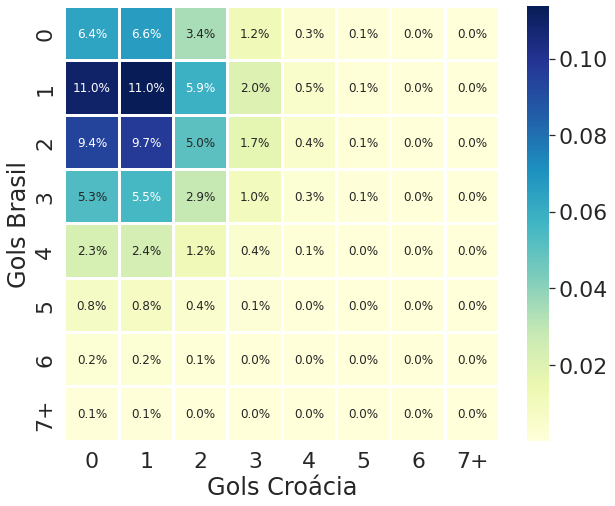

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
s1 = 'Brasil'
s2 = 'Croácia'
jogo = ProbabilidadesPartidas(s1, s2)

matriz = jogo['matriz']

fig, ax0 = plt.subplots(figsize=(10,8))
ax = sns.heatmap(matriz, annot=True, square=True, linewidth=2., cmap="YlGnBu",
                 annot_kws={'fontsize':12},
                 yticklabels=['0', '1', '2', '3', '4', '5', '6', '7+'], 
                 xticklabels=['0', '1', '2', '3', '4', '5', '6', '7+'])
for t in ax.texts: t.set_text(f'{str(round(100*float(t.get_text()),1))}%')
plt.ylabel('Gols ' + s1)
plt.xlabel('Gols ' + s2)
fig.show()

# st.write(fig)